In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [73]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [74]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [75]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [77]:
inspector = inspect(engine)
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [155]:
t_d = dt.date(2017,8,23)
delta = dt.timedelta(days=365)
q_d = t_d - delta
print(q_d)

2016-08-23


# Exploratory Climate Analysis

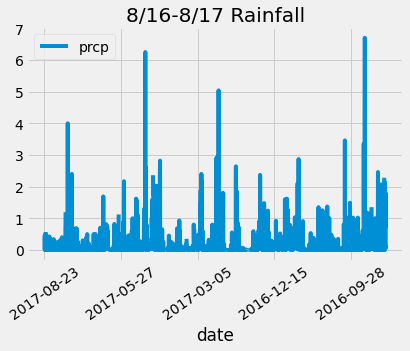

In [178]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
columns = [
    Measurement.id,
    Measurement.prcp,
    Measurement.date
]

t_d = dt.date(2017,8,23)
delta = dt.timedelta(days=365)
q_d = t_d - delta

ref_list = session.query(*columns)\
    .order_by(Measurement.date.desc())\
    .filter(Measurement.date >= q_d)\
    .all()

date = [measurement[2] for measurement in ref_list]
rain = [measurement[1] for measurement in ref_list]

df= pd.DataFrame({
    'date':date,
    'prcp':rain
})
df.set_index('date', inplace=True)
df
df.plot.line(title="8/16-8/17 Rainfall", rot=35)
plt.show()


In [182]:
# Calculate the date 1 year ago from the last data point in the database
target_date = dt.date(2017, 8, 23)
delta = dt.timedelta(days=365)
query_date = target_date - delta

In [183]:
# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .all()
for r in date_prcp:
    print(r.date,r.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

2017-05-20 0.01
2017-05-22 None
2017-05-23 0.11
2017-05-24 0.1
2017-05-25 0.07
2017-05-26 0.0
2017-05-27 0.0
2017-05-28 0.02
2017-05-29 0.0
2017-05-30 0.04
2017-05-31 0.0
2017-06-01 0.0
2017-06-02 0.15
2017-06-03 0.16
2017-06-04 0.05
2017-06-05 0.02
2017-06-06 0.0
2017-06-07 0.0
2017-06-08 0.01
2017-06-09 0.0
2017-06-10 0.53
2017-06-11 0.14
2017-06-12 0.35
2017-06-13 0.1
2017-06-14 0.21
2017-06-15 0.3
2017-06-16 0.02
2017-06-17 0.02
2017-06-18 0.18
2017-06-19 0.19
2017-06-20 0.17
2017-06-23 None
2017-06-26 None
2017-06-29 None
2017-06-30 0.0
2017-07-03 None
2017-07-05 None
2017-07-07 None
2017-07-08 0.06
2017-07-09 0.0
2017-07-10 0.0
2017-07-11 0.0
2017-07-12 0.02
2017-07-13 0.3
2017-07-14 0.0
2017-07-15 0.01
2017-07-16 0.12
2017-07-17 0.16
2017-07-18 0.0
2017-07-19 0.09
2017-07-20 0.0
2017-07-21 0.0
2017-07-22 0.12
2017-07-23 0.07
2017-07-24 1.19
2017-07-25 0.12
2017-07-26 0.02
2017-07-27 0.0
2017-07-28 0.14
2017-07-29 0.02
2017-07-31 None
2017-08-01 0.12
2017-08-02 0.05
2017-08-03 0.

2017-03-09 0.65
2017-03-10 0.03
2017-03-11 0.01
2017-03-12 0.0
2017-03-13 0.0
2017-03-14 0.0
2017-03-15 0.06
2017-03-16 0.0
2017-03-17 0.12
2017-03-18 0.0
2017-03-19 0.0
2017-03-20 0.02
2017-03-21 0.09
2017-03-22 0.0
2017-03-23 0.0
2017-03-24 0.12
2017-03-25 0.93
2017-03-26 0.0
2017-03-27 0.01
2017-03-28 0.0
2017-03-29 0.01
2017-03-30 0.04
2017-03-31 0.01
2017-04-01 0.21
2017-04-02 0.0
2017-04-03 0.26
2017-04-04 0.09
2017-04-05 0.1
2017-04-06 0.06
2017-04-07 0.0
2017-04-08 0.0
2017-04-09 0.0
2017-04-10 0.01
2017-04-11 0.03
2017-04-12 0.11
2017-04-13 0.59
2017-04-14 2.3
2017-04-15 0.38
2017-04-16 0.47
2017-04-17 1.04
2017-04-18 2.03
2017-04-19 0.02
2017-04-20 0.05
2017-04-21 1.74
2017-04-22 1.58
2017-04-23 0.06
2017-04-24 0.01
2017-04-25 0.0
2017-04-26 0.02
2017-04-27 0.19
2017-04-28 0.76
2017-04-29 0.37
2017-04-30 1.04
2017-05-01 0.13
2017-05-02 0.01
2017-05-03 0.01
2017-05-04 0.0
2017-05-05 0.0
2017-05-06 0.0
2017-05-07 0.02
2017-05-08 0.73
2017-05-09 1.58
2017-05-10 0.2
2017-05-11 0.

In [184]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_prcp, columns=['Date','Prcp'])

In [185]:
# Sort the dataframe by date
prcp_df.set_index('Date', inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

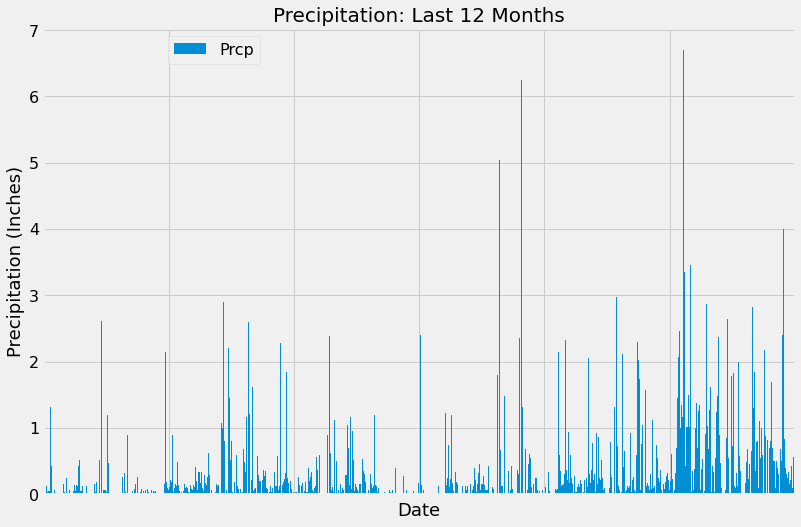

In [252]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation: Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig("Output/Precipitation.png")
plt.show

In [218]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [221]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(Station).count()
print(available_stations)

9


In [222]:
inspector = inspect(engine)
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [244]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                                .group_by(Measurement.station)\
                                .order_by(func.count(Measurement.station).desc())\
                                .all()


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [249]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
best_station = active_stations[0][0]
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == best_station).all()
print(result)

[(54.0, 85.0, 71.66378066378067)]


<function matplotlib.pyplot.show(*args, **kw)>

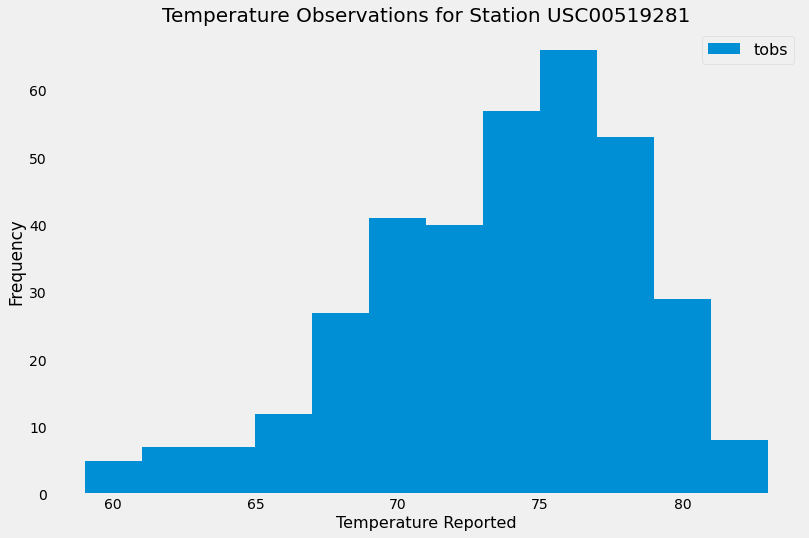

In [253]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_result = session.query(Measurement.station, Measurement.tobs)\
                .filter(Measurement.station == best_station)\
                .filter(Measurement.date >= query_date).all()
tobs_df = pd.DataFrame(t_result)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("Output/StationTemps.png")
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
